In [102]:
import pandas as pd 
data = pd.read_csv("meetup_member_joins.csv", sep=" ", parse_dates=["joined"])

In [117]:
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 7, 2

import matplotlib.dates  as mdates
import numpy as np

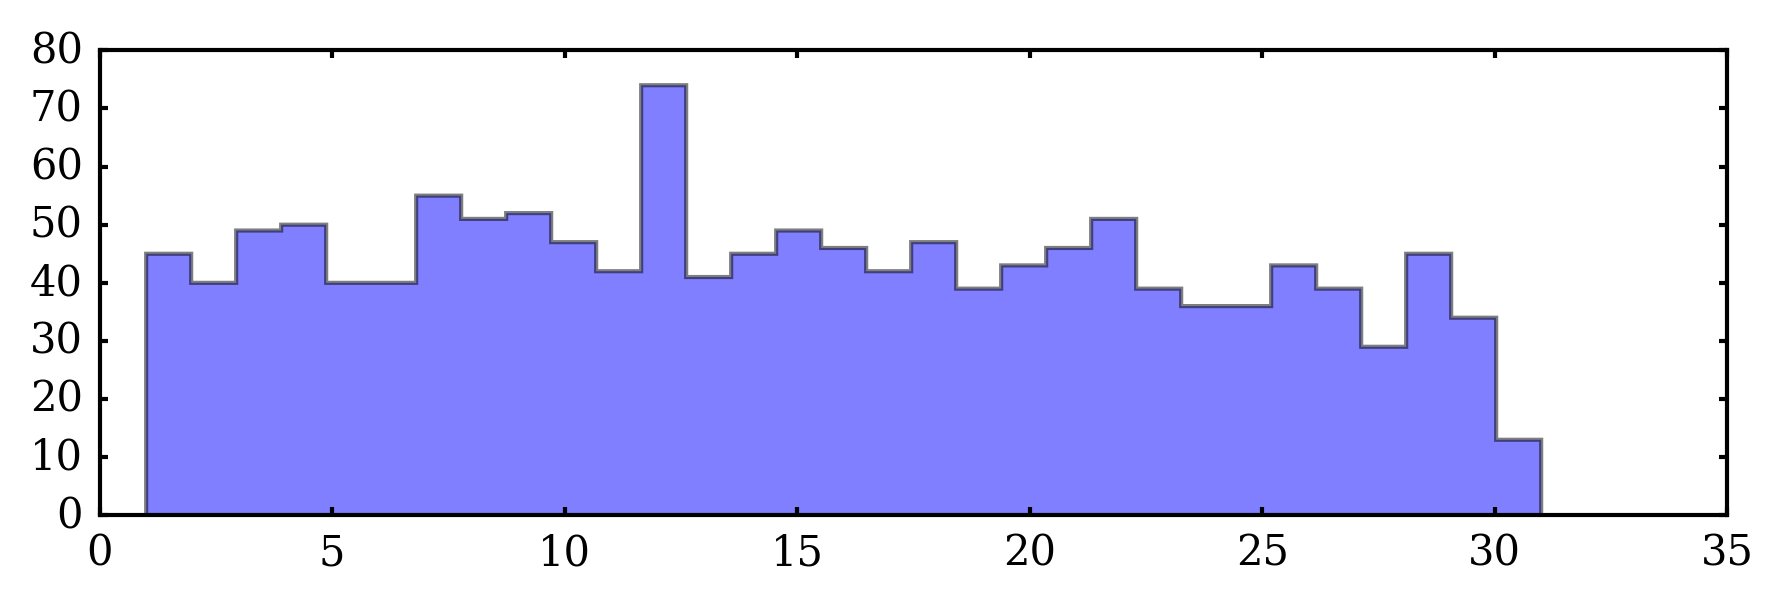

In [118]:
plt.hist(data.joined.dt.day, bins=31, histtype= 'stepfilled', range=[1,31], alpha=0.5)
plt.show()

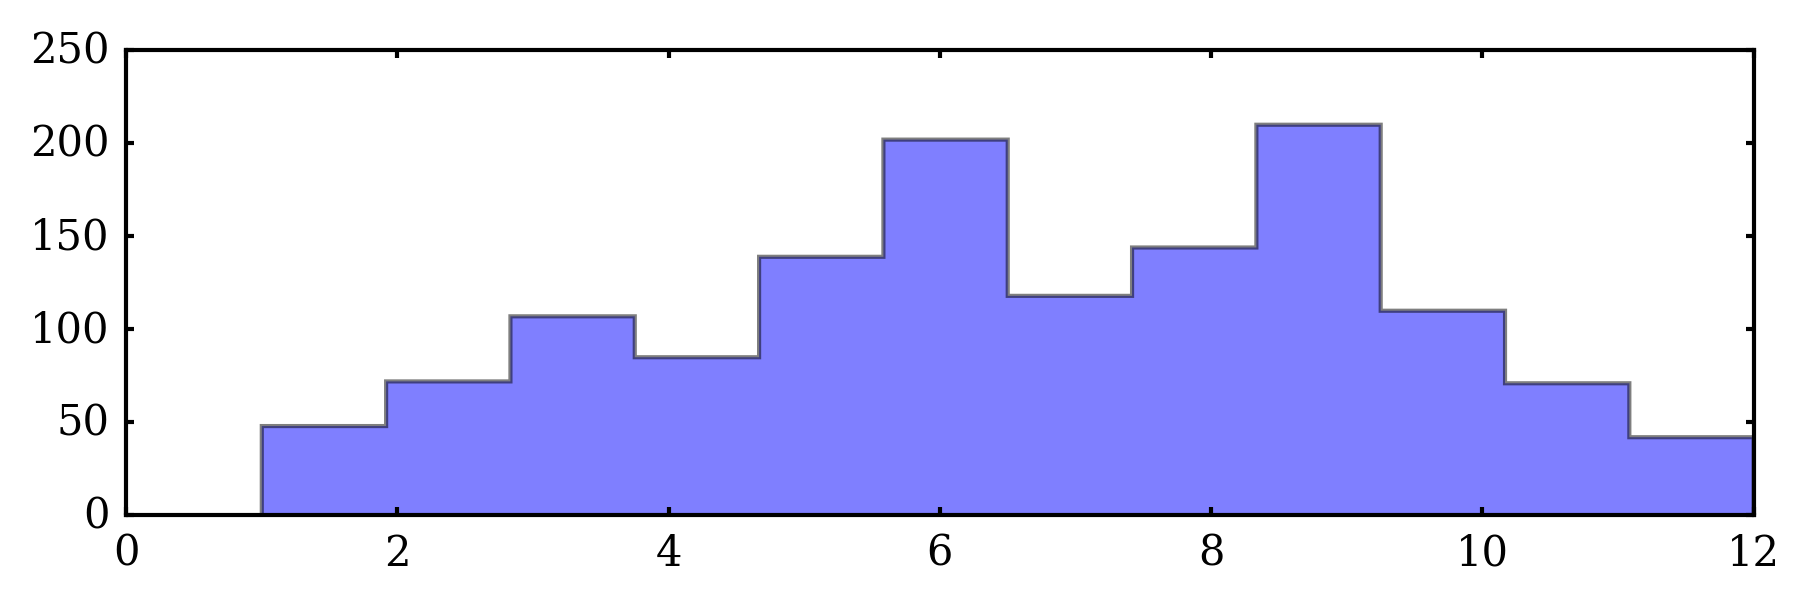

In [119]:
plt.hist(data.joined.dt.month, bins=12, histtype= 'stepfilled', range=[1,12], alpha=0.5)
plt.show()

In [120]:
ts = data.sort_values(by='joined')
ts['time'] = pd.to_datetime(ts.joined )

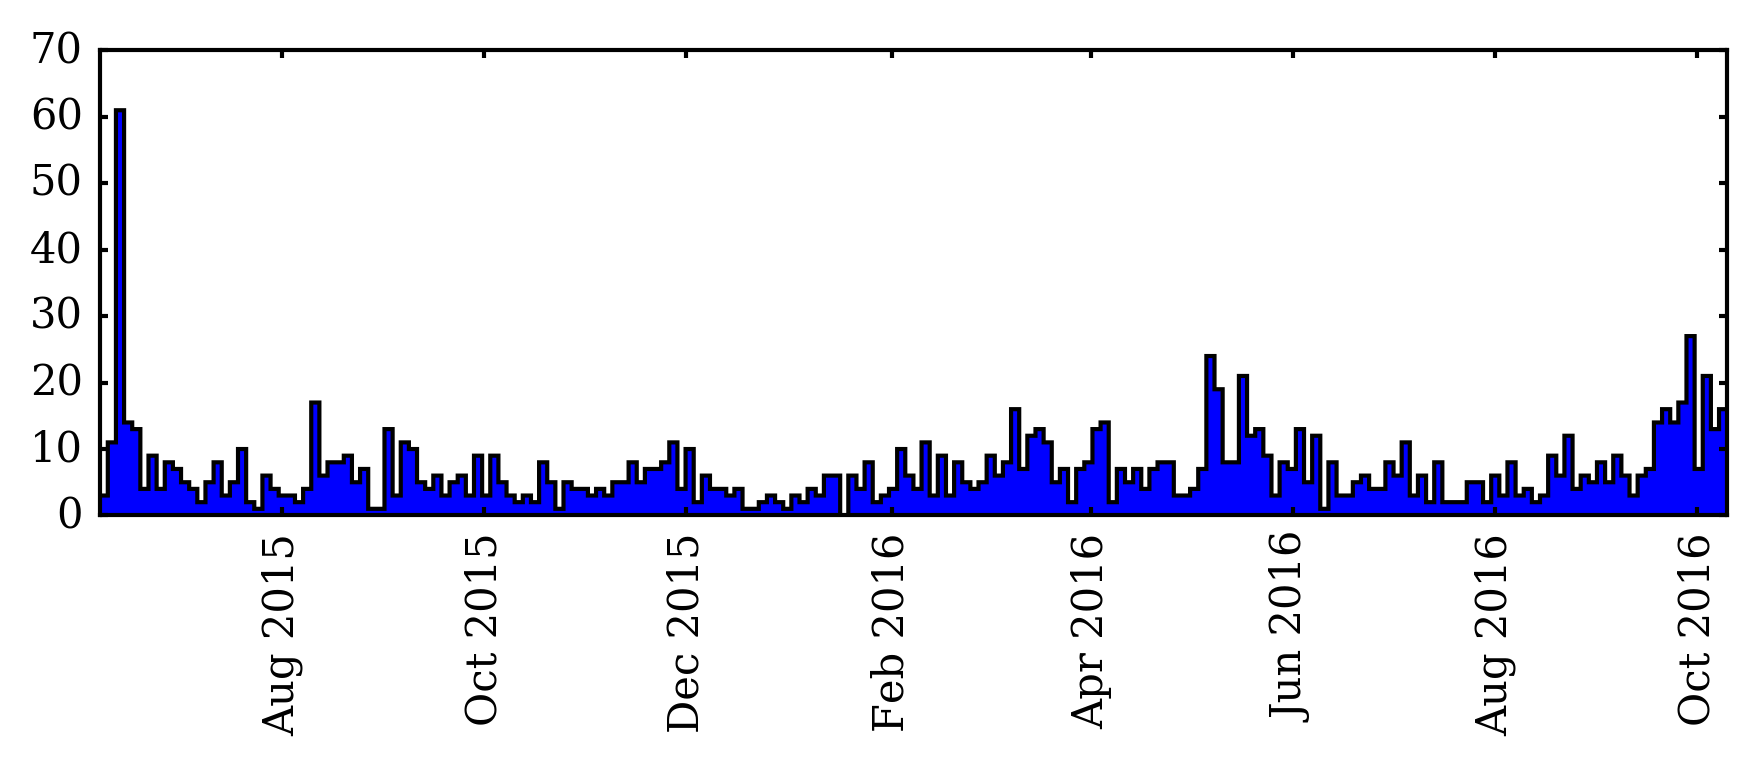

In [121]:
x, y,_ = plt.hist(ts.time.dt.to_pydatetime(), bins=200, histtype= 'stepfilled')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.show()

In [122]:
dd = data.groupby(by='joined', as_index=True).count()
dd.describe()

,ID
count,434.000000
mean,3.105991
std,2.707071
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,36.000000


In [123]:
dd.index

DatetimeIndex(['2015-06-07', '2015-06-09', '2015-06-10', '2015-06-11',
               '2015-06-12', '2015-06-13', '2015-06-14', '2015-06-15',
               '2015-06-16', '2015-06-17',
               ...
               '2016-10-01', '2016-10-02', '2016-10-03', '2016-10-04',
               '2016-10-05', '2016-10-06', '2016-10-07', '2016-10-08',
               '2016-10-09', '2016-10-10'],
              dtype='datetime64[ns]', name=u'joined', length=434, freq=None)

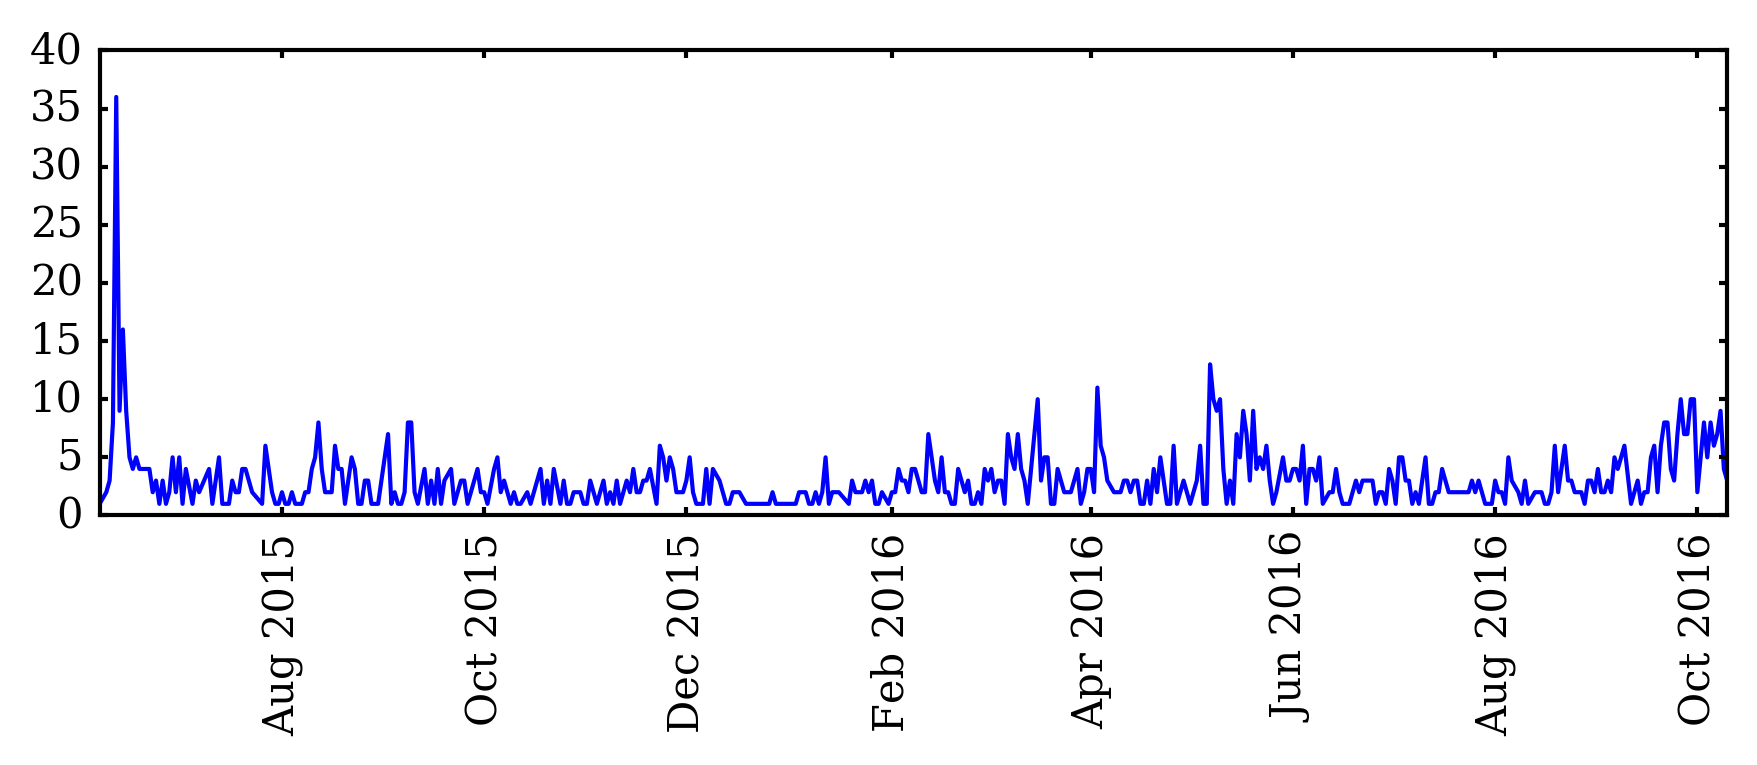

In [124]:
plt.plot(dd)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

plt.show()

In [125]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries, window = 15):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()#pd.rolling_mean(timeseries, window=12)
    rolstd  = timeseries.rolling(window=window).std()#pd.rolling_std (timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=90)
    plt.show(block=False)
    

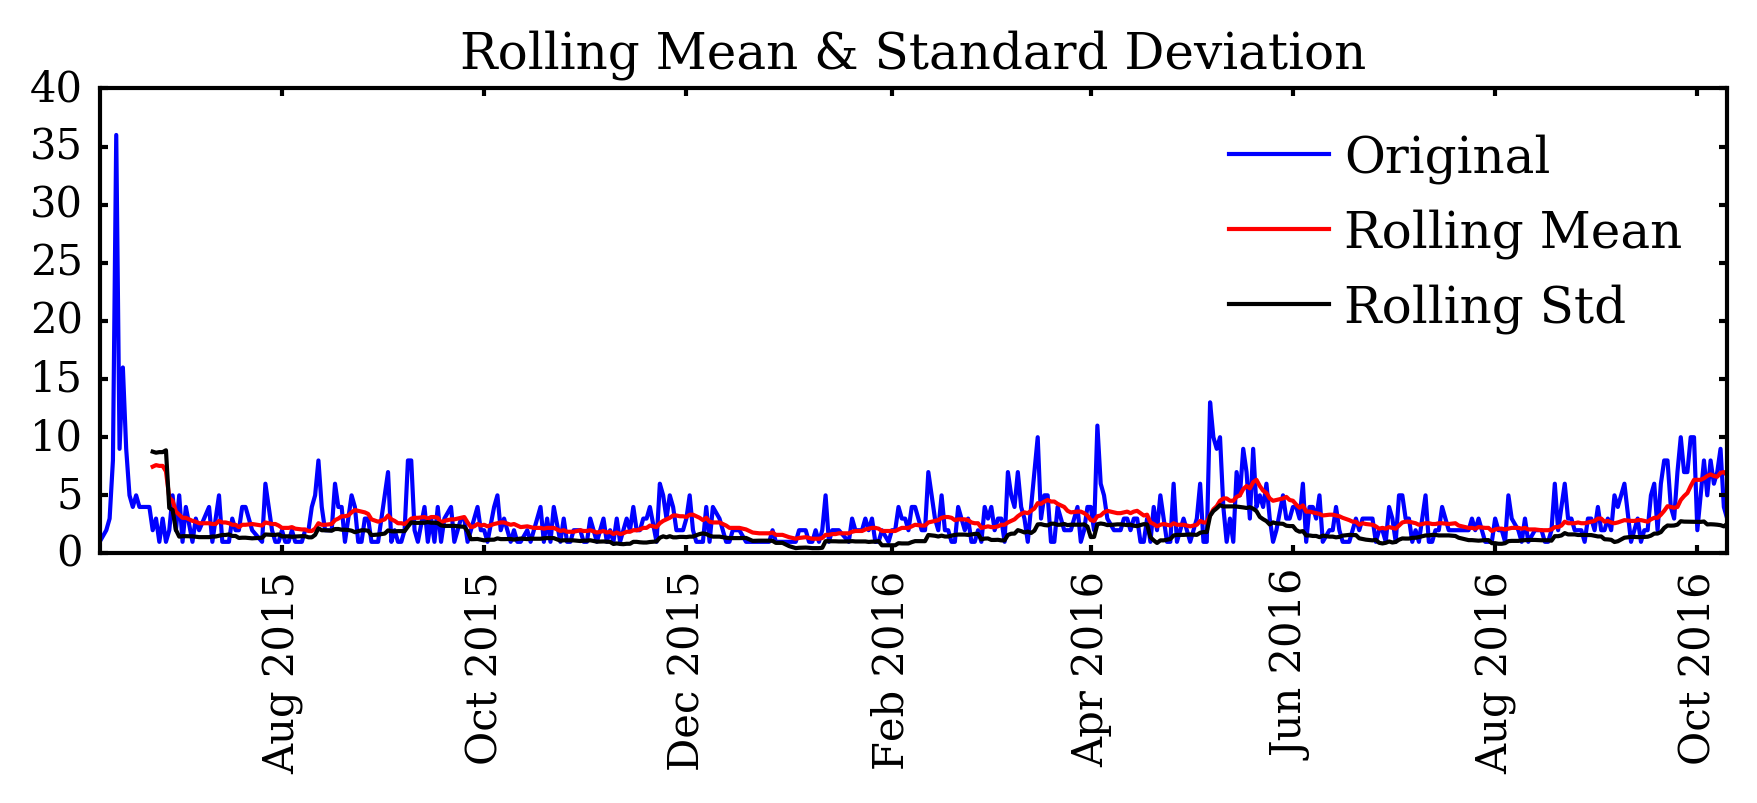

In [126]:
test_stationarity(dd)

In [127]:
dd_week = dd.resample('7d').sum()

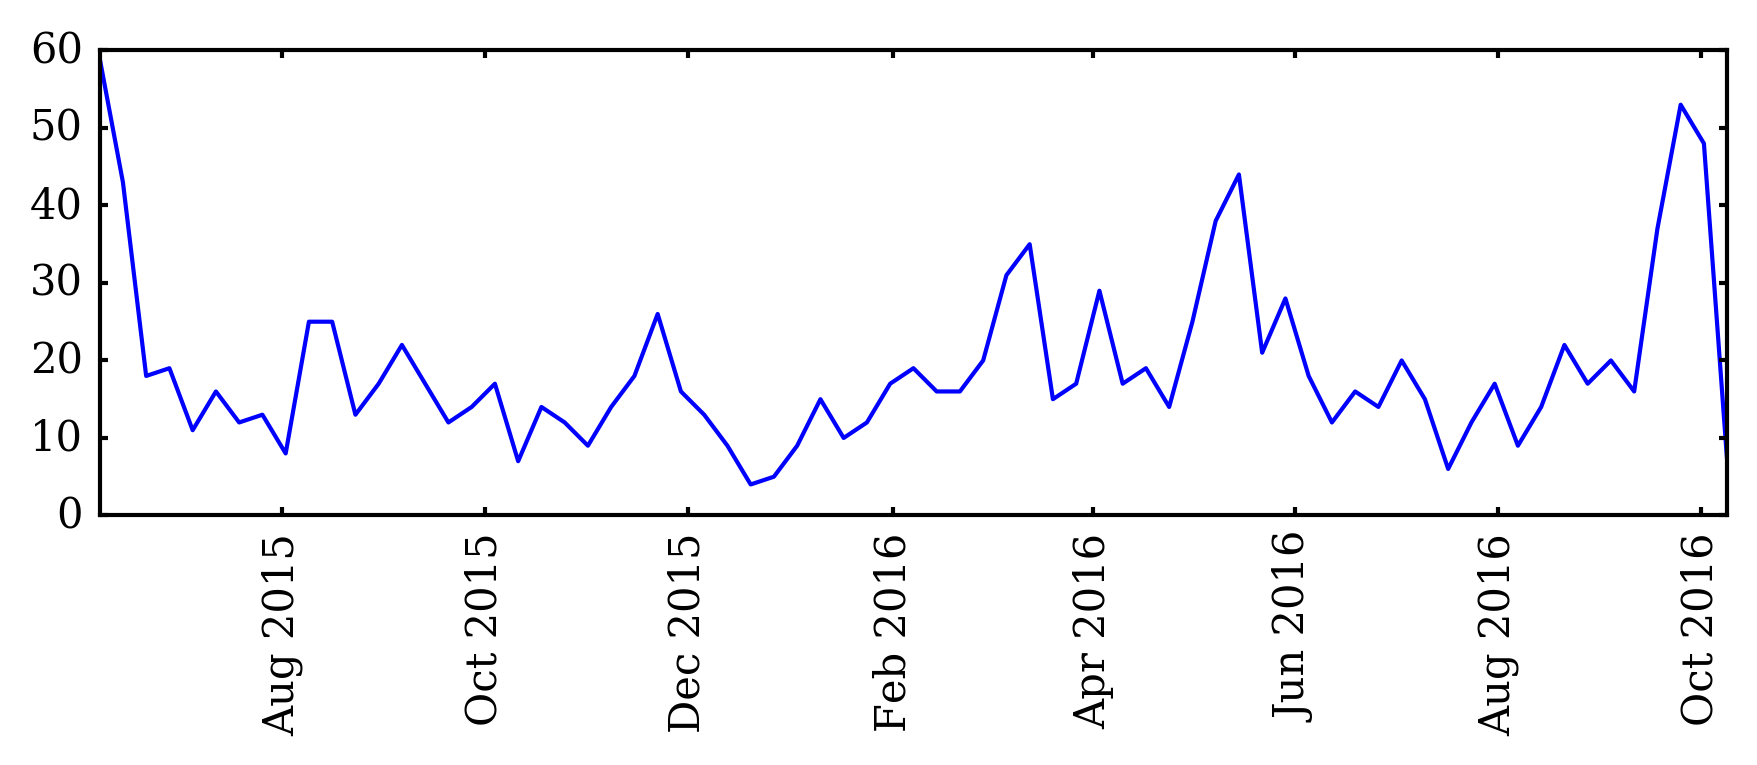

In [128]:
plt.plot(dd_week)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

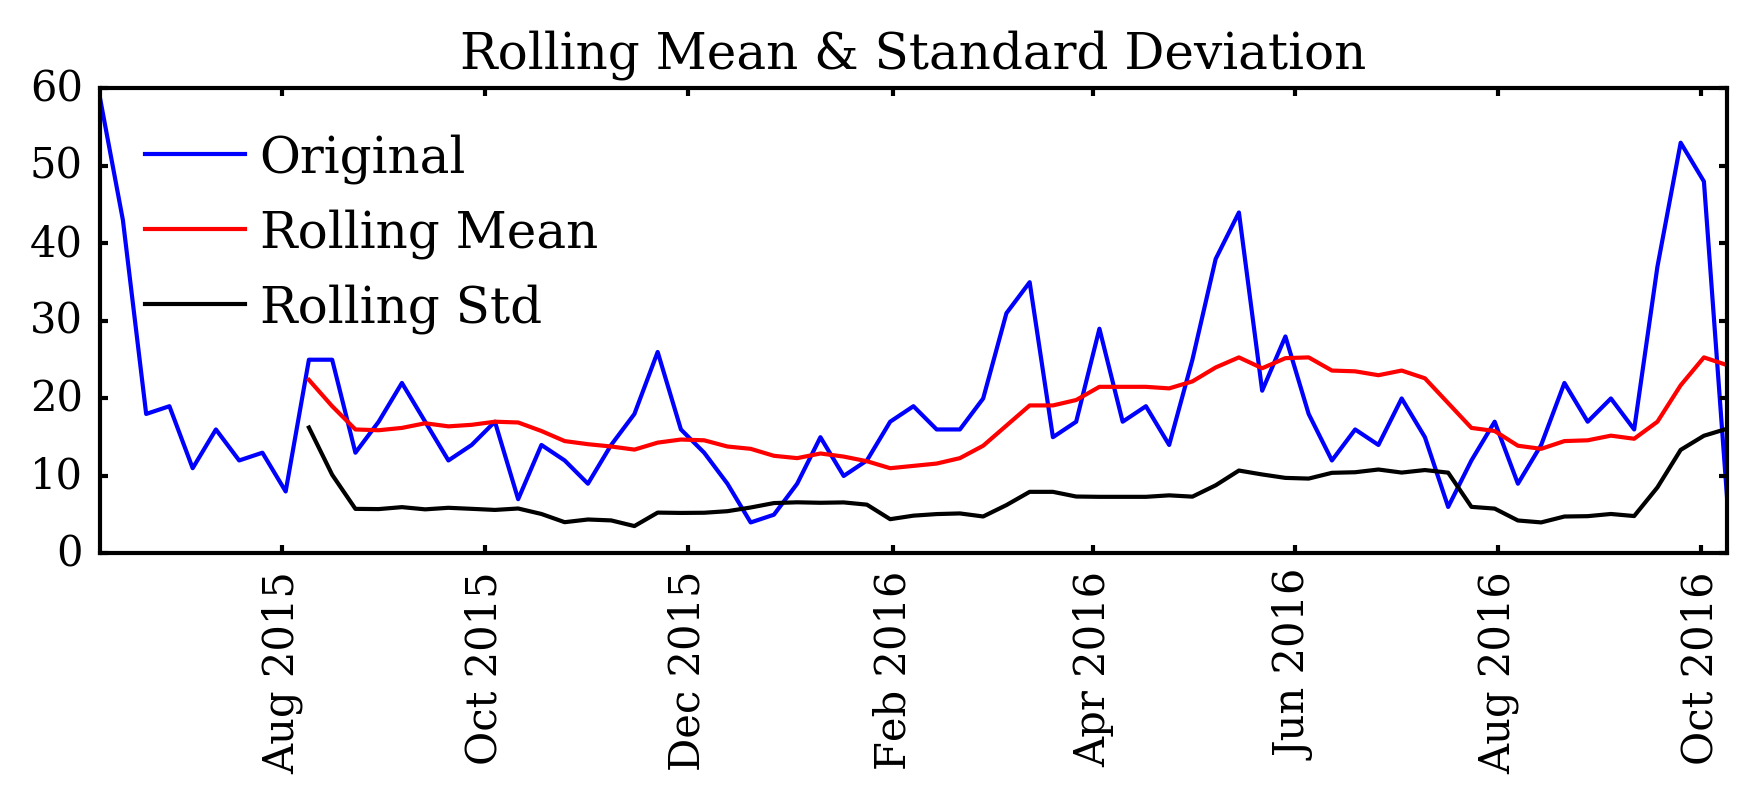

In [129]:
test_stationarity(dd_week, window = 10)

[None, None, None, None, None, None, None, None]

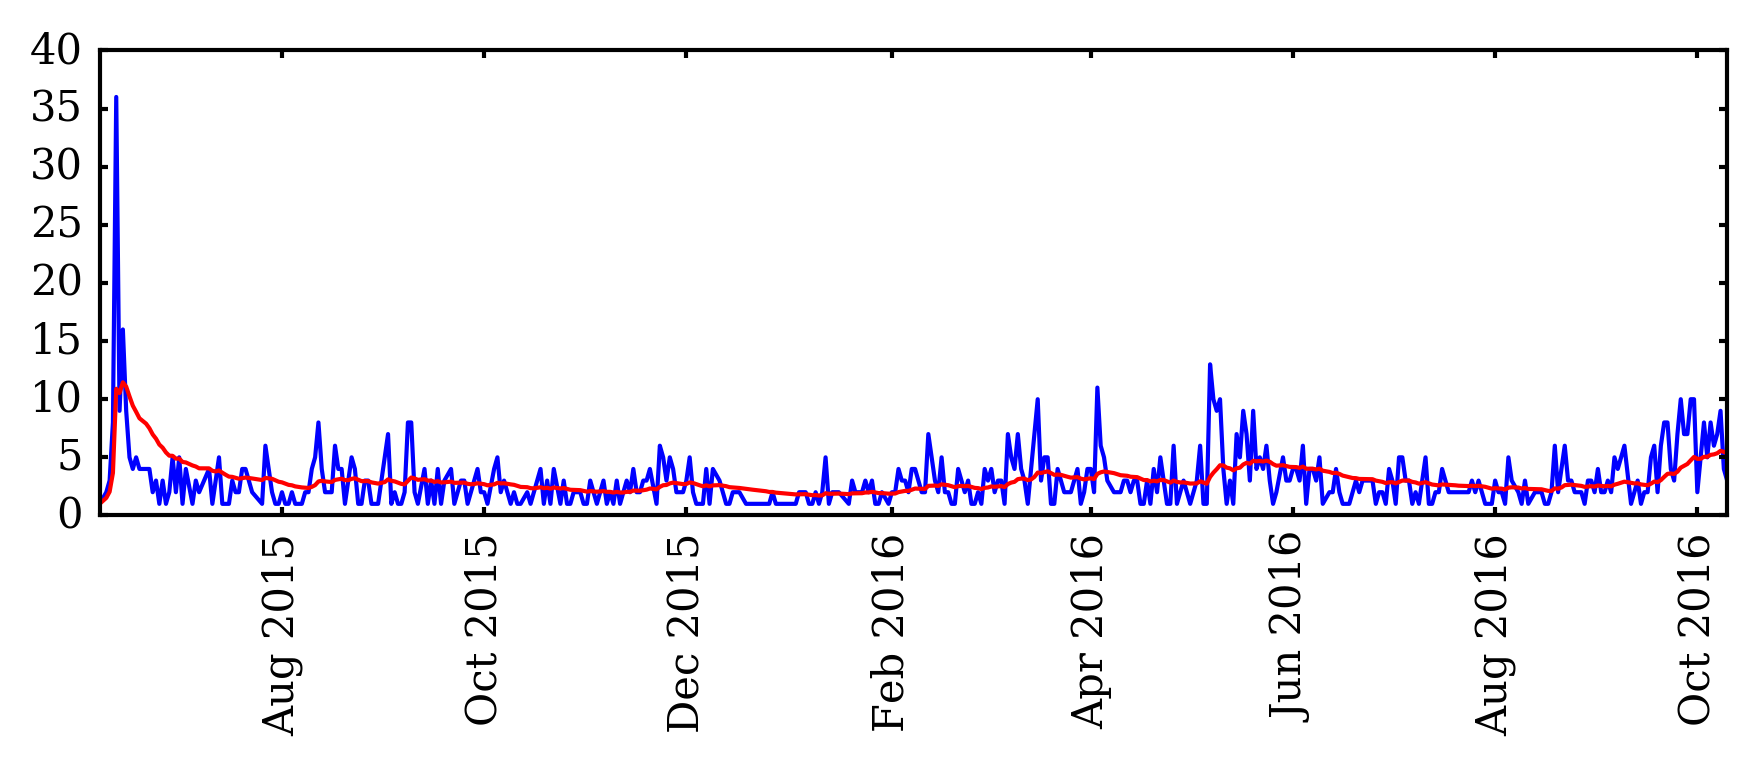

In [130]:
expwighted_avg = dd.ewm(halflife=12).mean()
plt.plot(dd)
plt.plot(expwighted_avg, color='red')
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)

In [131]:
google = pd.read_csv("google.csv", sep=",", parse_dates=["Week"])

In [132]:
gg = google.groupby(by='Week', as_index=True).sum()

In [133]:
gg.index

DatetimeIndex(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
               '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
               '2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22',
               '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-19',
               '2015-04-26', '2015-05-03', '2015-05-10', '2015-05-17',
               '2015-05-24', '2015-05-31', '2015-06-07', '2015-06-14',
               '2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
               '2015-07-19', '2015-07-26', '2015-08-02', '2015-08-09',
               '2015-08-16', '2015-08-23', '2015-08-30', '2015-09-06',
               '2015-09-13', '2015-09-20', '2015-09-27', '2015-10-04',
               '2015-10-11', '2015-10-18', '2015-10-25', '2015-11-01',
               '2015-11-08', '2015-11-15', '2015-11-22', '2015-11-29',
               '2015-12-06', '2015-12-13', '2015-12-20', '2015-12-27',
               '2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
      

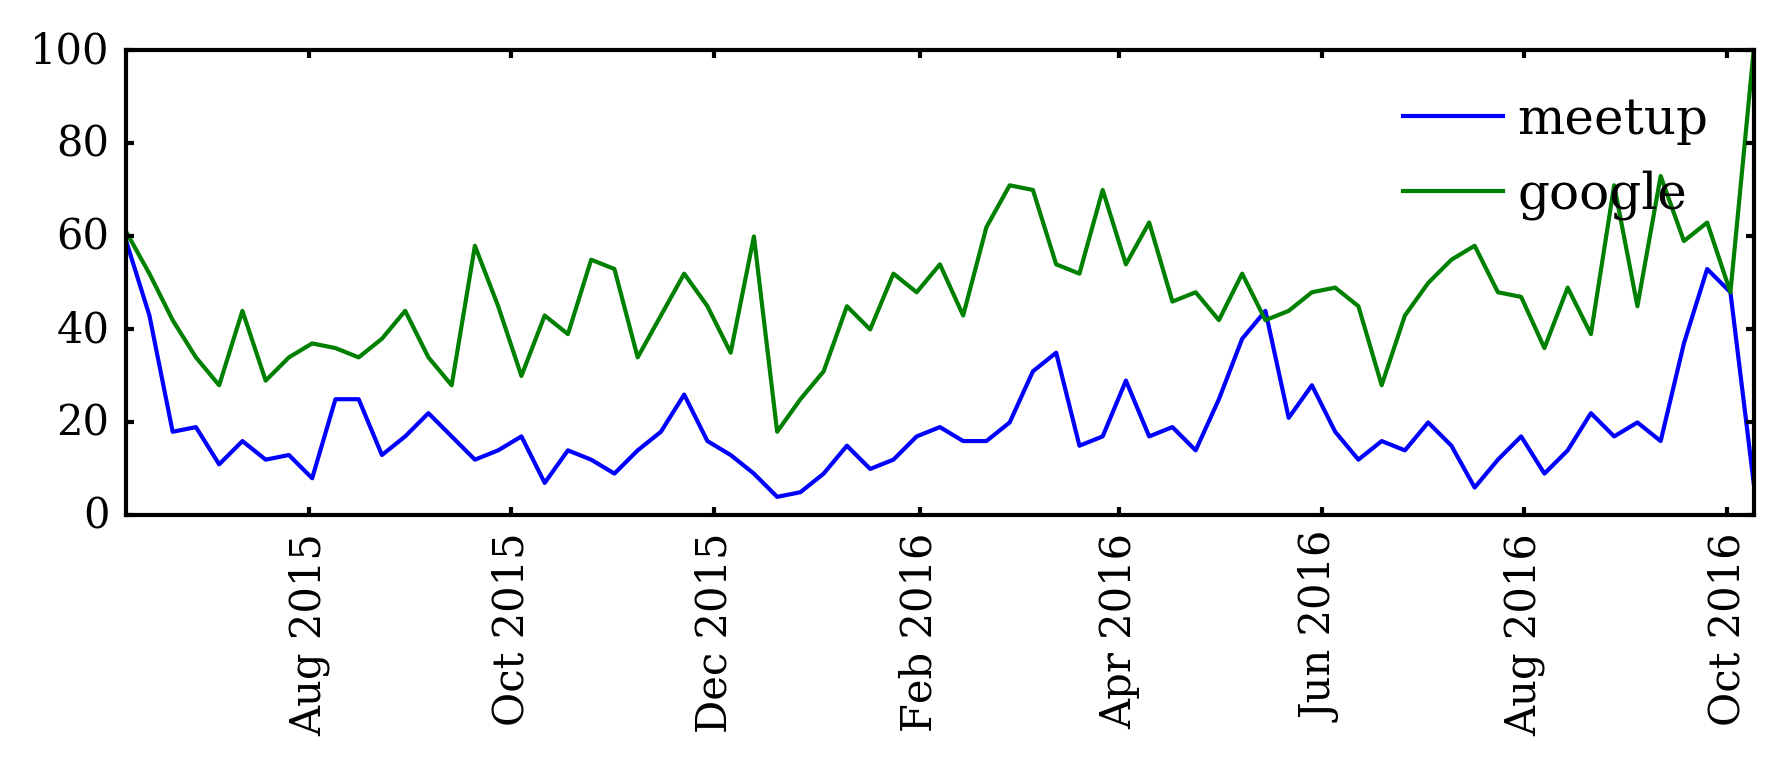

In [134]:
plt.plot(dd_week, label = "meetup")
plt.plot(gg[ dd_week.index.min(): dd_week.index.max()]     , label = "google")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend()
plt.show()

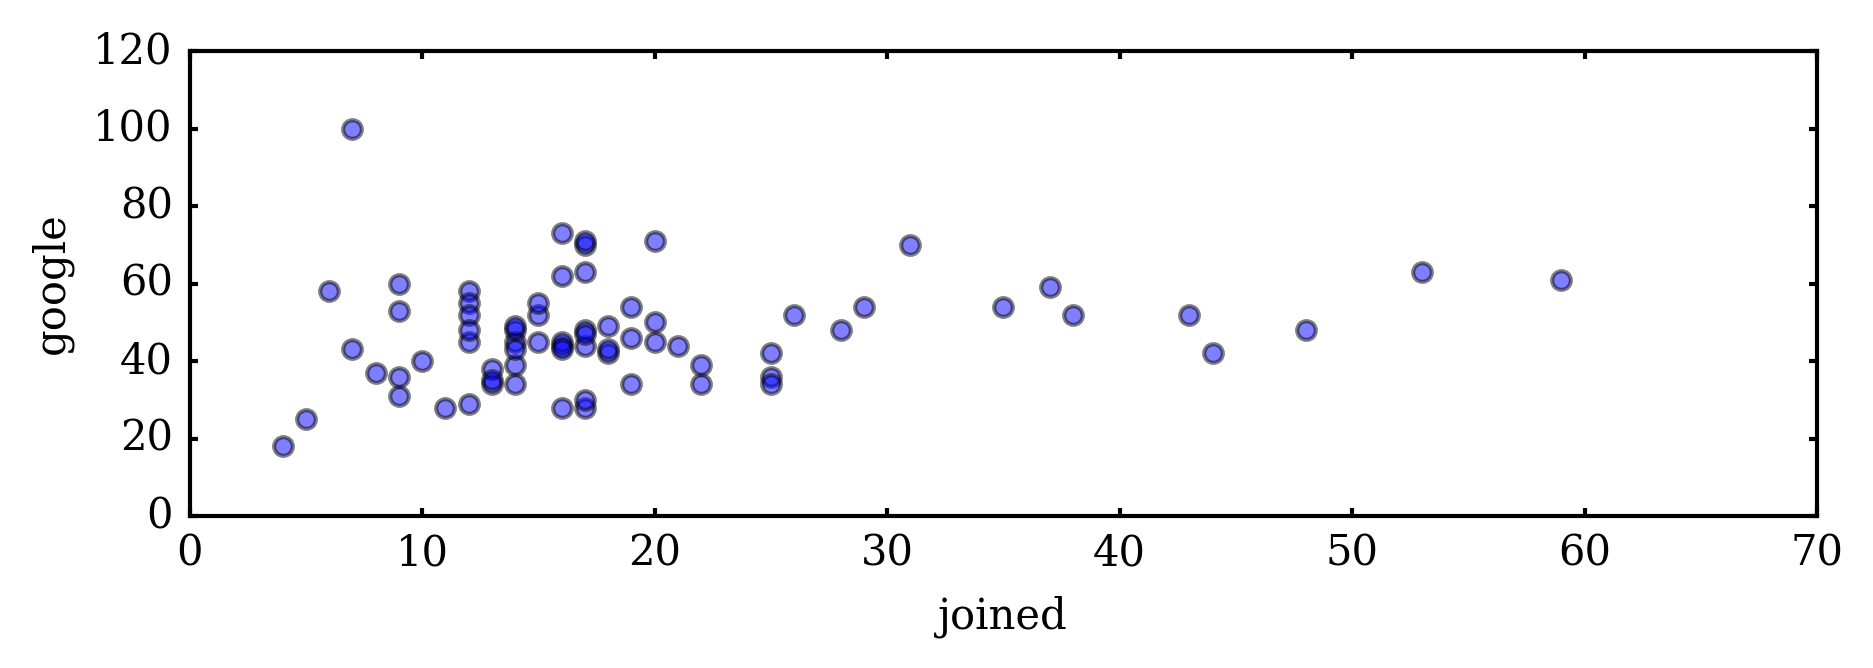

In [135]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

plt.scatter(dd_week,
            gg[ dd_week.index.min(): dd_week.index.max()], 
            alpha=0.5)
plt.xlabel('joined')
plt.ylabel('google')

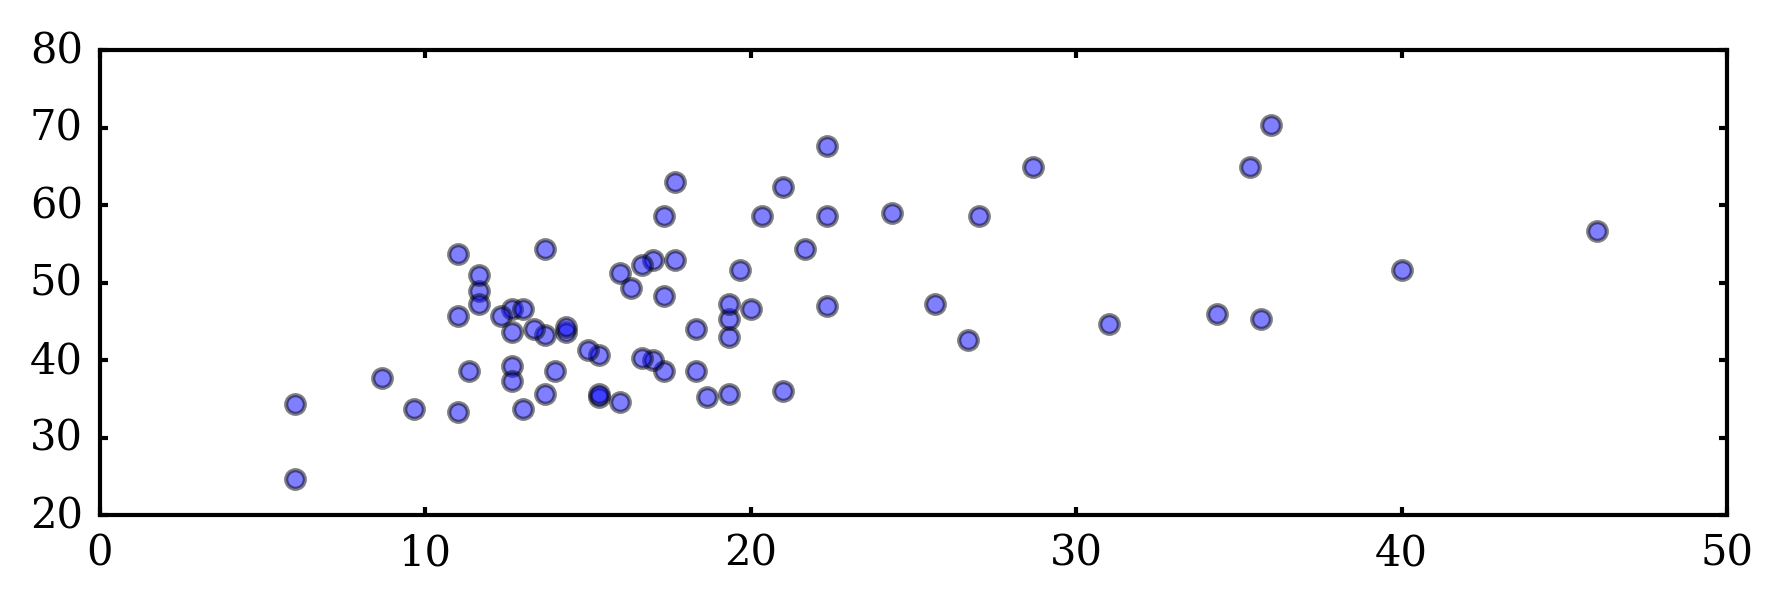

In [136]:
plt.scatter(dd_week.rolling(window=3).mean(),
            gg[ dd_week.index.min(): dd_week.index.max()].rolling(window=3).mean(), 
            alpha=0.5)

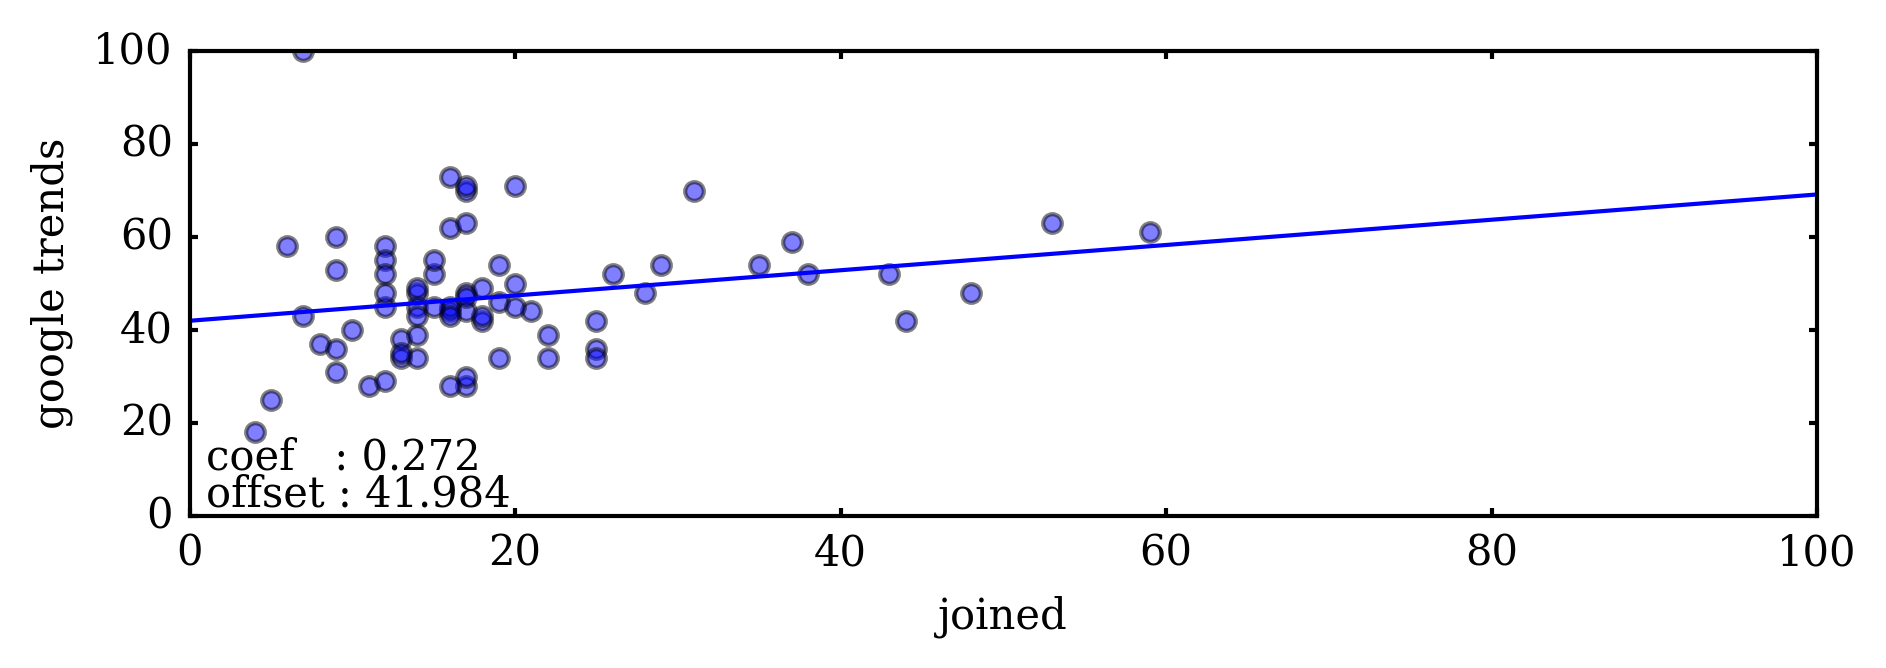

In [137]:
plt.scatter(dd_week,
            gg[ dd_week.index.min(): dd_week.index.max()], 
            alpha=0.5)
plt.xlabel('joined')
plt.ylabel('google trends')

xx = dd_week.ID
yy = gg[ dd_week.index.min(): dd_week.index.max()].kaggle

fit_data = pd.DataFrame({'x': xx,
                         'y': yy})
fit_data
# xx, yy
# Fit the model
t = np.linspace(0, 100, 100)
model = ols("y ~ x", fit_data).fit()
offset, coef = model._results.params
plt.plot(t, t*coef + offset)
plt.xlim([0,100])
plt.ylim([0,100])
plt.text(1, 2, 'offset : %1.3f' % offset)
plt.text(1,10, 'coef   : %1.3f' % coef  )
plt.show()

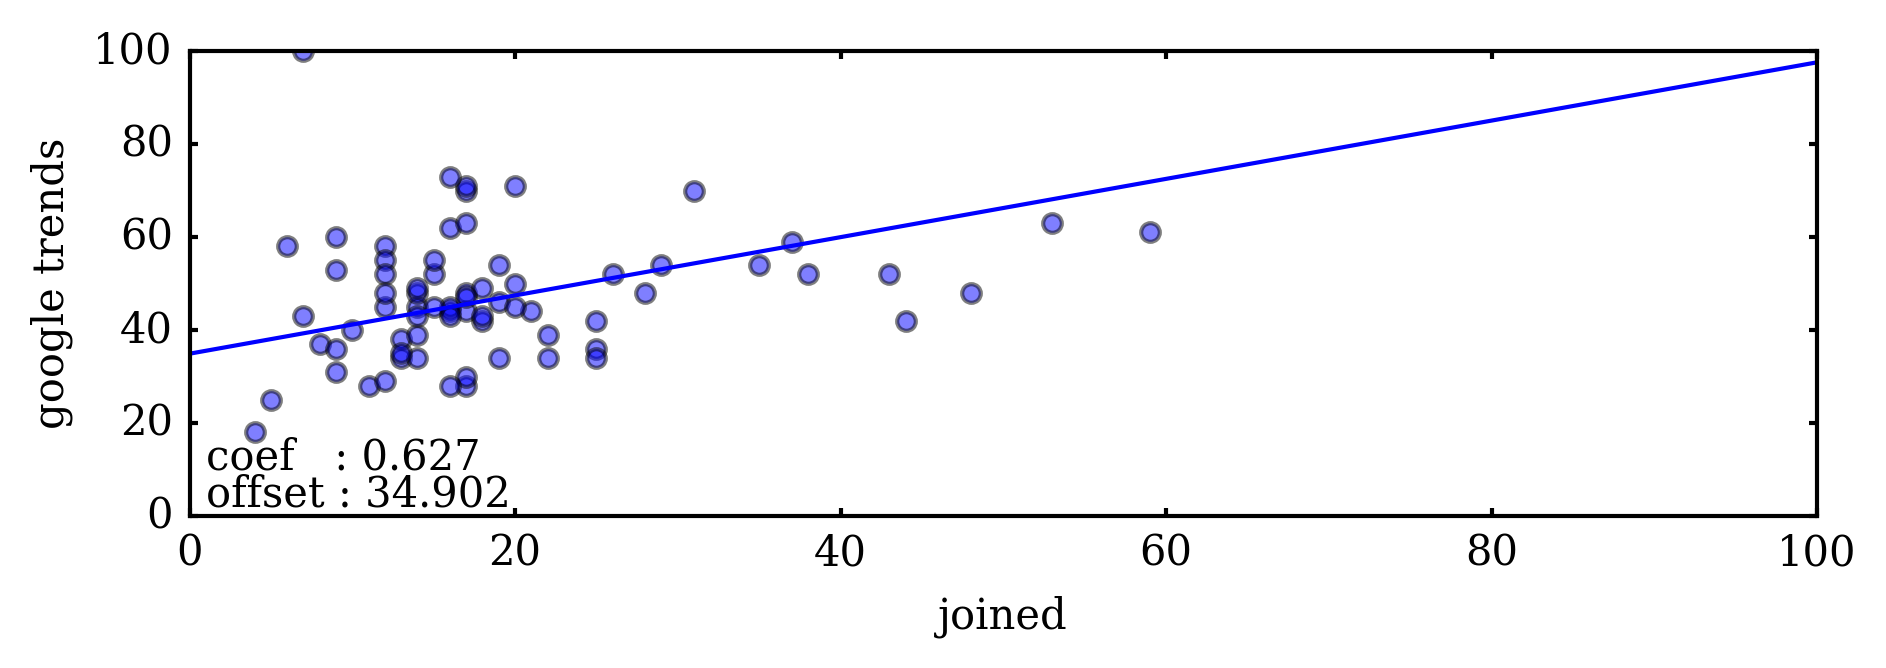

In [138]:
plt.scatter(dd_week,
            gg[ dd_week.index.min(): dd_week.index.max()], 
            alpha=0.5)
plt.xlabel('joined')
plt.ylabel('google trends')

xx = dd_week.rolling(window=3).mean().ID
yy = gg[ dd_week.index.min(): dd_week.index.max()].rolling(window=3).mean().kaggle

fit_data = pd.DataFrame({'x': xx,
                         'y': yy})
fit_data
# xx, yy
# Fit the model
t = np.linspace(0, 100, 100)
model = ols("y ~ x", fit_data).fit()
offset, coef = model._results.params
plt.plot(t, t*coef + offset)
plt.xlim([0,100])
plt.ylim([0,100])
plt.text(1, 2, 'offset : %1.3f' % offset)
plt.text(1,10, 'coef   : %1.3f' % coef  )
plt.show()

In [139]:
google2 = pd.read_csv("google-trends-ml-uk.csv", sep=",", parse_dates=["Week"])
gg2 = google2.groupby(by='Week', as_index=True).sum()

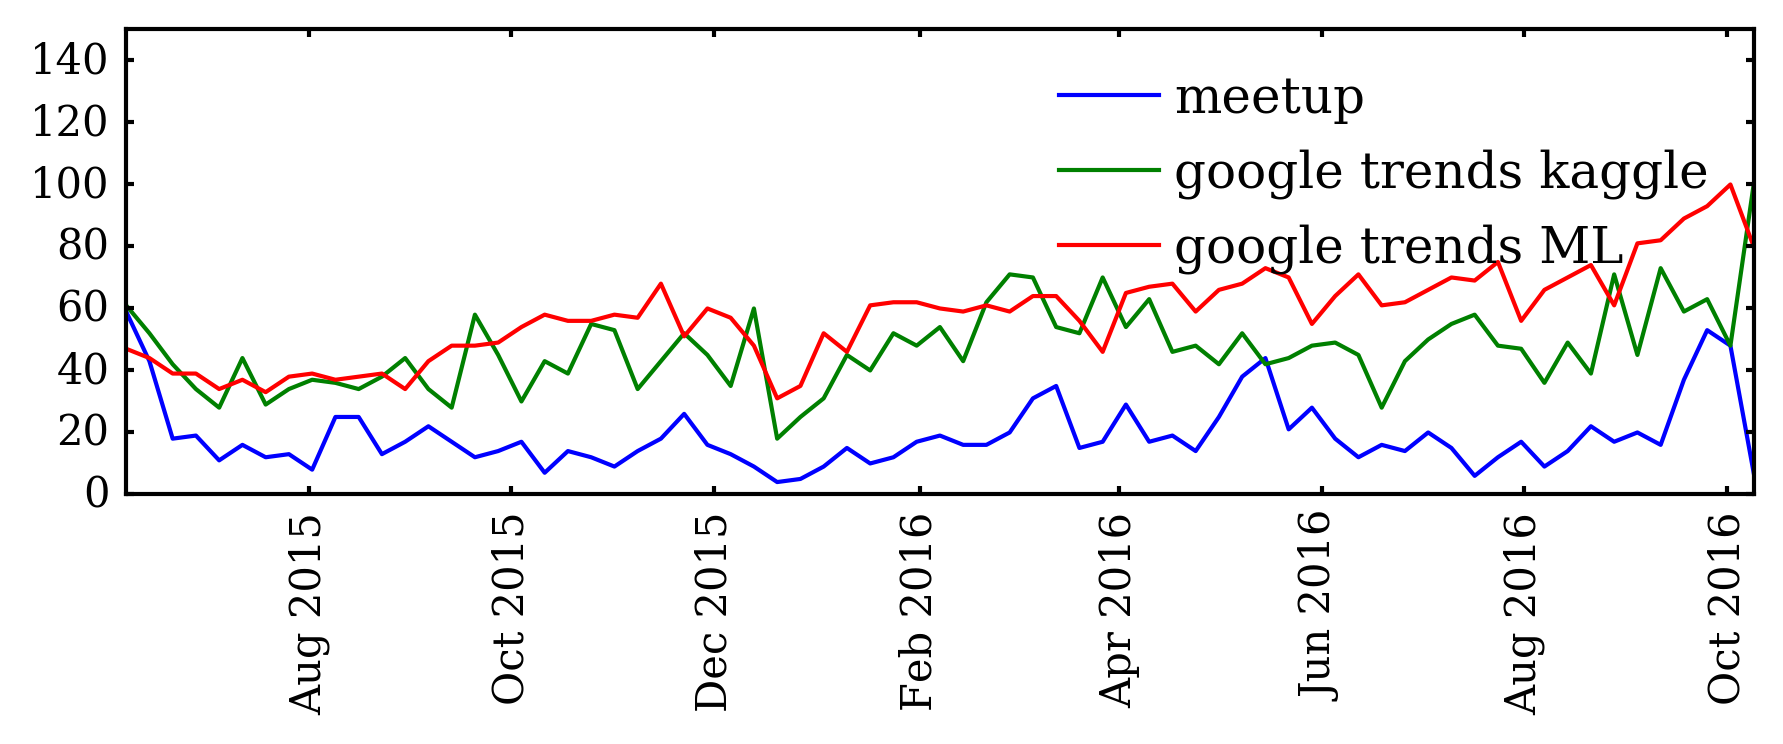

In [140]:
plt.plot(dd_week, label = "meetup")
plt.plot(gg [ dd_week.index.min(): dd_week.index.max()]     , label = "google trends kaggle")
plt.plot(gg2[ dd_week.index.min(): dd_week.index.max()]     , label = "google trends ML")
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.legend()
plt.ylim([0,150])
plt.show()

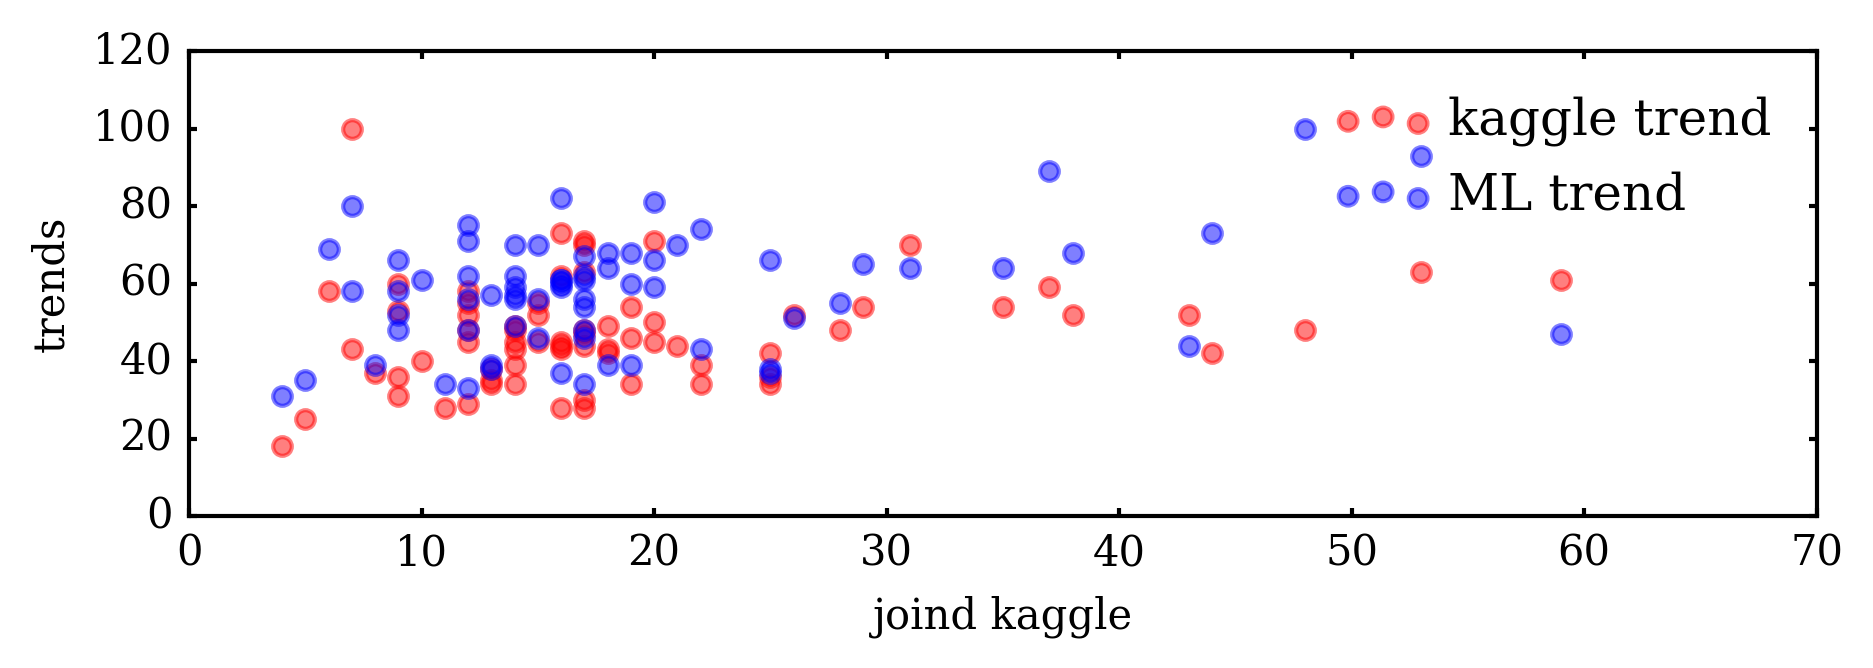

In [141]:
plt.scatter(dd_week,
            gg[ dd_week.index.min(): dd_week.index.max()], 
            alpha=0.5, label= 'kaggle trend', color='red')
plt.scatter(dd_week,
            gg2[ dd_week.index.min(): dd_week.index.max()], 
            alpha=0.5, label= 'ML trend', color='blue')
plt.legend()
plt.xlabel('joind kaggle')
plt.ylabel('trends')
plt.show()

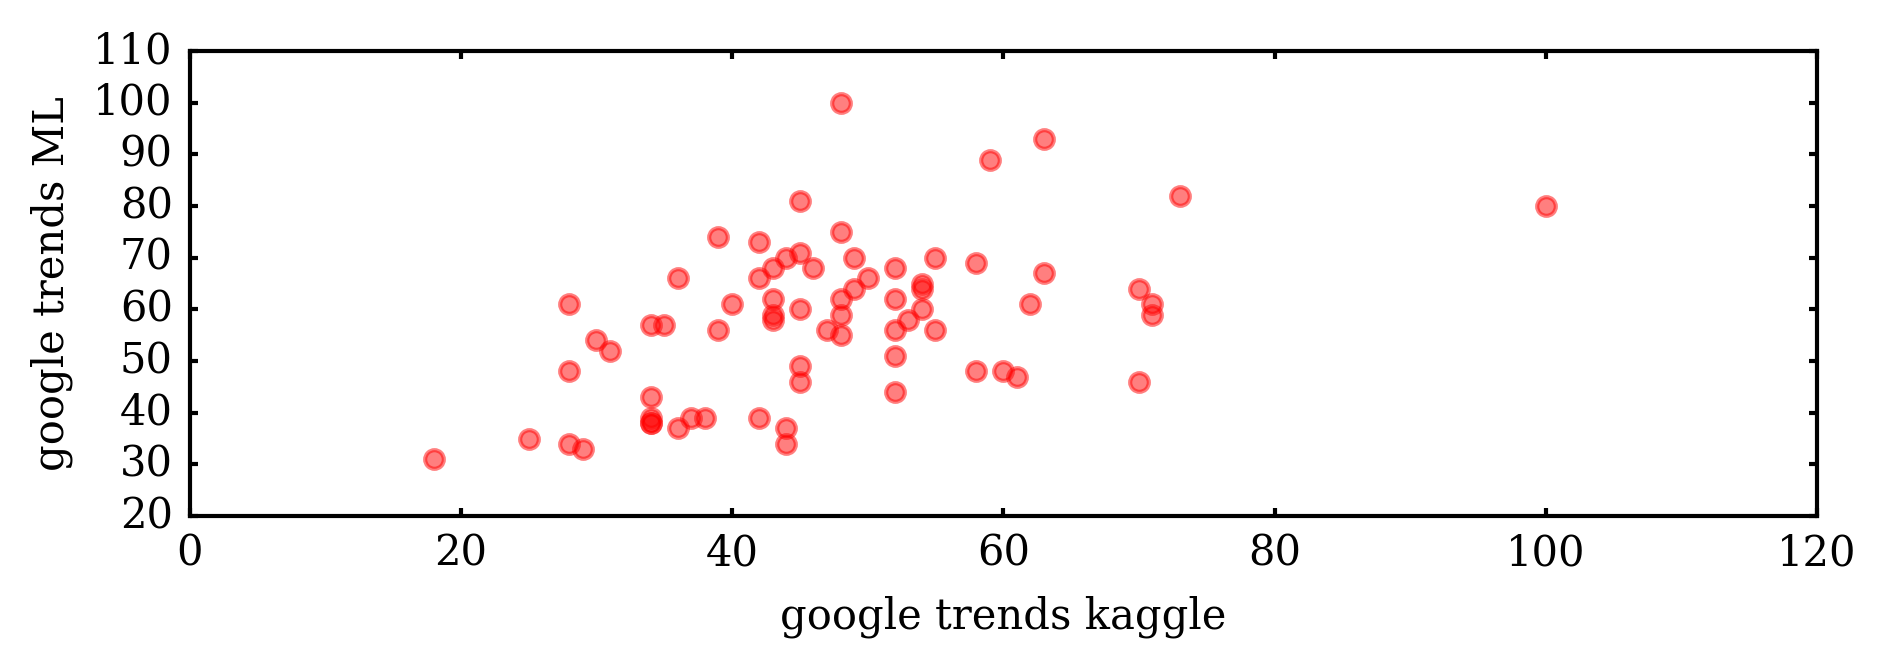

In [142]:
plt.scatter(gg [ dd_week.index.min(): dd_week.index.max()],
            gg2[ dd_week.index.min(): dd_week.index.max()], 
            alpha=0.5, label= 'kaggle trend', color='red')
plt.xlabel('google trends kaggle')
plt.ylabel('google trends ML')
plt.show()